In [105]:
import sys
sys.path.append('../python/')
import asteriks as ak
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd
import os
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
obj = pd.read_pickle('/Users/ch/K2/projects/moving_objects/out.p')

for i,o in obj.iterrows():
    if o.minmag=='0':
        continue
    
    a = ak.Asteroid(o.Name, campaign=int(o.Campaign), dir='/Volumes/cupertino/database/')
    channels = np.unique(a.ephem.channels)
    for c in channels:
        if os.path.isfile('/Users/ch/K2/projects/asteroid/output/images/{}_{}.png'.format(a.name.replace(' ',''),c)):
            continue
        print(o.Name,c)
        t, f = a.lightcurve(c,r=5)
        fig=plt.figure(figsize=(10,3))
        plt.scatter(t,f,s=1)
        plt.xlabel('Time (BJD)',fontsize=15)
        plt.ylabel('Counts ($e^{-}s^{-1}$)',fontsize=15)
        plt.title('{} (Channel:{} Campaign:{})'.format(a.name,a.channel,a.campaign),fontsize=15)
        fig.savefig('/Users/ch/K2/projects/asteroid/output/images/{}_{}.png'.format(a.name.replace(' ',''),c),dpi=200,bbox_inches='tight')
        pd.DataFrame(np.asarray([t,f]).T,columns=["Time","Counts"]).to_csv('/Users/ch/K2/projects/asteroid/output/lcs/{}_{}.csv'.format(a.name.replace(' ',''),c),index=False)


10989 52


Finding asteroid
Finding overlaps for difference imaging.


 15%|█▍        | 562/3863 [00:18<01:50, 29.75it/s]

AttributeError: 'Asteroid' object has no attribute 'channels'

In [43]:
a = ak.Asteroid('1999 TS40', campaign=8, dir='/Volumes/cupertino/database/')

In [44]:
t, f = a.lightcurve(r=5)

Finding asteroid
Finding overlaps for difference imaging.


100%|██████████| 3853/3853 [02:11<00:00, 29.27it/s]
3853it [00:07, 493.02it/s]
../python/asteriks.py:376: RuntimeWarning: invalid value encountered in subtract
  im = np.copy(self.reconstruct(self.ar,c))-np.copy(self.reconstruct(self.mod,c))
../python/asteriks.py:406: RuntimeWarning: invalid value encountered in subtract
  im = np.copy(self.reconstruct(self.ar,c))-np.copy(self.reconstruct(self.mod,c))


Finding background (lagged 0.5 days)


3853it [00:07, 544.95it/s]
../python/asteriks.py:406: RuntimeWarning: invalid value encountered in subtract
  im = np.copy(self.reconstruct(self.ar,c))-np.copy(self.reconstruct(self.mod,c))


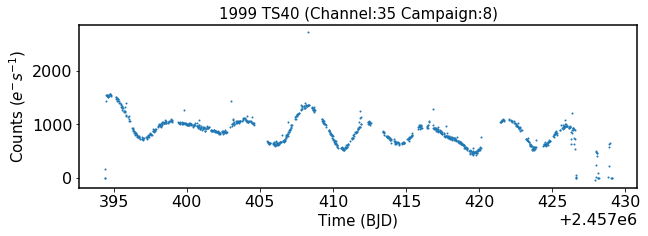

In [67]:
fig=plt.figure(figsize=(10,3))
plt.scatter(t,f,s=1)
plt.xlabel('Time (BJD)',fontsize=15)
plt.ylabel('Counts ($e^{-}s^{-1}$)',fontsize=15)
plt.title('{} (Channel:{} Campaign:{})'.format(a.name,a.channel,a.campaign),fontsize=15)
fig.savefig('/Users/ch/K2/projects/asteroid/output/images/{}.png'.format(a.name.replace(' ','')),dpi=200,bbox_inches='tight')
pd.DataFrame(np.asarray([t,f]).T,columns=["Time","Counts"]).to_csv('/Users/ch/K2/projects/asteroid/output/lcs/{}.csv'.format(a.name.replace(' ','')),index=False)

'1999TS40'